In [1]:
!pip install anndata

In [2]:
!pip install scanpy

In [1]:
import scanpy as sc
import anndata
import importlib
from sklearn.decomposition import PCA

import matplotlib as mpl

In [2]:
import h5py
import anndata

# Read the data into an AnnData object
adata_allcell = anndata.read_h5ad('TabulaSapiens_AllCells.h5ad')

print(adata_allcell) 

AnnData object with n_obs × n_vars = 483152 × 58604
    obs: 'tissue_in_publication', 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype'
    uns: '_scvi', '_training_mode', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_id_c

In [3]:
#shape of data matrix
print(adata_allcell.shape)

(483152, 58604)


In [4]:
#view variable names(genes)
print(adata_allcell.var_names)

Index(['ENSG00000223972', 'ENSG00000227232', 'ENSG00000278267',
       'ENSG00000243485', 'ENSG00000284332', 'ENSG00000237613',
       'ENSG00000268020', 'ENSG00000240361', 'ENSG00000186092',
       'ENSG00000238009',
       ...
       'ENSG00000198886', 'ENSG00000210176', 'ENSG00000210184',
       'ENSG00000210191', 'ENSG00000198786', 'ENSG00000198695',
       'ENSG00000210194', 'ENSG00000198727', 'ENSG00000210195',
       'ENSG00000210196'],
      dtype='object', name='ensemblid', length=58604)


In [5]:
#view observation names(cell)
print(adata_allcell.obs_names)

Index(['AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1',
       'AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1',
       'AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1',
       'AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1',
       'AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1',
       'AAAGAACGTTTCTTAC_TSP6_Liver_NA_10X_1_1',
       'AAAGAACTCCTTATGT_TSP6_Liver_NA_10X_1_1',
       'AAAGAACTCTTCTCAA_TSP6_Liver_NA_10X_1_1',
       'AAAGGATAGTCGAAAT_TSP6_Liver_NA_10X_1_1',
       'AAAGGATCAAATCAGA_TSP6_Liver_NA_10X_1_1',
       ...
       'TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P18_S378',
       'TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P19_S379',
       'TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P21_S381',
       'TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P2_S362',
       'TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P3_S363',
       'TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P4_S364',
       'TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothe

In [6]:
adata_allcell.obs

,tissue_in_publication,assay_ontology_term_id,donor_id,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,...,development_stage_ontology_term_id,self_reported_ethnicity_ontology_term_id,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7633.0,2259,macrophage,Monocyte/Macrophage,True,immune,...,HsapDv:0000161,HANCESTRO:0005,macrophage,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,2858.0,1152,monocyte,Monocyte,True,immune,...,HsapDv:0000161,HANCESTRO:0005,monocyte,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7787.0,2983,endothelial cell of hepatic sinusoid,Endothelial,True,endothelial,...,HsapDv:0000161,HANCESTRO:0005,endothelial cell of hepatic sinusoid,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,10395.0,2598,macrophage,Monocyte/Macrophage,True,immune,...,HsapDv:0000161,HANCESTRO:0005,macrophage,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,6610.0,2125,liver dendritic cell,Dendritic cell,True,immune,...,HsapDv:0000161,HANCESTRO:0005,liver dendritic cell,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P4_S364,Vasculature,EFO:0008931,TSP2,aorta,13205.0,579,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P5_S365,Vasculature,EFO:0008931,TSP2,aorta,9565.0,529,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367,Vasculature,EFO:0008931,TSP2,aorta,195639.0,2753,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P8_S368,Vasculature,EFO:0008931,TSP2,aorta,37260.0,984,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage


In [6]:
adata_allcell.var

,feature_type,highly_variable,means,dispersions,dispersions_norm,mean,std,feature_is_filtered,feature_name,feature_reference,feature_biotype
ensemblid,,,,,,,,,,,
ENSG00000223972,Gene Expression,False,6.398244e-05,0.835044,-0.573947,0.000039,0.005574,False,DDX11L1,NCBITaxon:9606,gene
ENSG00000227232,Gene Expression,False,2.274395e-03,2.442280,0.533203,0.001080,0.031731,False,WASH7P,NCBITaxon:9606,gene
ENSG00000278267,Gene Expression,False,6.175251e-05,1.295335,-0.256874,0.000033,0.005634,False,MIR6859-1,NCBITaxon:9606,gene
ENSG00000243485,Gene Expression,False,1.372886e-04,2.656352,0.680668,0.000048,0.008041,False,MIR1302-2HG,NCBITaxon:9606,gene
ENSG00000284332,Gene Expression,False,1.000000e-12,NaN,0.000000,0.000000,1.000000,False,MIR1302-2,NCBITaxon:9606,gene
...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695,Gene Expression,False,9.634841e-01,2.466404,0.154140,0.590065,0.741395,False,MT-ND6,NCBITaxon:9606,gene
ENSG00000210194,Gene Expression,False,1.600667e-01,1.603787,-0.044396,0.083929,0.301820,False,MT-TE,NCBITaxon:9606,gene
ENSG00000198727,Gene Expression,False,4.367693e+00,4.765751,-0.499747,3.874830,1.104192,False,MT-CYB,NCBITaxon:9606,gene


In [8]:
print(adata_allcell.X)

  (0, 38)	2.3135313987731934
  (0, 137)	2.0179240703582764
  (0, 148)	1.7682451009750366
  (0, 197)	2.9146568775177
  (0, 229)	1.7524958848953247
  (0, 256)	1.6055938005447388
  (0, 266)	1.9191335439682007
  (0, 273)	1.162739634513855
  (0, 297)	0.9415412545204163
  (0, 332)	2.2555065155029297
  (0, 350)	2.5699217319488525
  (0, 364)	3.0685348510742188
  (0, 366)	1.6374199390411377
  (0, 386)	4.195008754730225
  (0, 416)	3.158424139022827
  (0, 420)	2.244354009628296
  (0, 423)	1.7902170419692993
  (0, 477)	2.25921893119812
  (0, 492)	2.2818408012390137
  (0, 518)	1.5732617378234863
  (0, 541)	1.9862010478973389
  (0, 581)	3.7468507289886475
  (0, 612)	2.1255297660827637
  (0, 623)	1.233912467956543
  (0, 625)	2.1744208335876465
  :	:
  (483151, 57606)	2.9305412769317627
  (483151, 57631)	0.0
  (483151, 57650)	0.0
  (483151, 57841)	0.0
  (483151, 57850)	0.7359117865562439
  (483151, 57916)	0.6552510261535645
  (483151, 57934)	5.593571662902832
  (483151, 57943)	1.8877639770507812
  (48

In [9]:
adata_allcell.X

<483152x58604 sparse matrix of type '<class 'numpy.float32'>'
	with 1270410953 stored elements in Compressed Sparse Row format>

In [8]:
#removing cells with less than 500 genes
sc.pp.filter_cells(adata_allcell, min_genes=500)

In [9]:
#removing genes with less than 3 cells
sc.pp.filter_genes(adata_allcell, min_cells=3)

In [10]:
#shape of data matrix
print(adata_allcell.shape)

(469291, 56353)


Normalization

In [11]:
# Normalization
sc.pp.normalize_total(adata_allcell, target_sum=1e6)
#sc.pp.log1p(adata_allcell)

In [12]:
# Normalization
#adata_allcell.obs["n_counts"] = adata_allcell.X.sum(axis=1).A1


In [13]:
adata_allcell.obs

,tissue_in_publication,assay_ontology_term_id,donor_id,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,...,development_stage_ontology_term_id,self_reported_ethnicity_ontology_term_id,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7633.0,2258,macrophage,Monocyte/Macrophage,True,immune,...,HsapDv:0000161,HANCESTRO:0005,macrophage,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,2858.0,1152,monocyte,Monocyte,True,immune,...,HsapDv:0000161,HANCESTRO:0005,monocyte,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7787.0,2981,endothelial cell of hepatic sinusoid,Endothelial,True,endothelial,...,HsapDv:0000161,HANCESTRO:0005,endothelial cell of hepatic sinusoid,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,10395.0,2594,macrophage,Monocyte/Macrophage,True,immune,...,HsapDv:0000161,HANCESTRO:0005,macrophage,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,6610.0,2124,liver dendritic cell,Dendritic cell,True,immune,...,HsapDv:0000161,HANCESTRO:0005,liver dendritic cell,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P4_S364,Vasculature,EFO:0008931,TSP2,aorta,13205.0,579,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P5_S365,Vasculature,EFO:0008931,TSP2,aorta,9565.0,528,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367,Vasculature,EFO:0008931,TSP2,aorta,195639.0,2751,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P8_S368,Vasculature,EFO:0008931,TSP2,aorta,37260.0,983,endothelial cell,endothelial cell,True,endothelial,...,HsapDv:0000155,HANCESTRO:0016,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage


In [14]:
df_obs_cell = adata_allcell.obs.copy()

df_obs_cell.to_excel("cells_metadata_norm.xlsx")

In [16]:
sc.pp.log1p(adata_allcell)

df_obs_cell = adata_allcell.obs.copy()

df_obs_cell.to_excel("cells_metadata_norm_log.xlsx")

In [14]:
#not executing
sc.pp.normalize_total(adata_allcell, target_sum=1e6)
adata_allcell.obs["n_counts_normalized"] = adata_allcell.X.sum(axis=1).A1

In [15]:
adata_allcell.obs

,tissue_in_publication,assay_ontology_term_id,donor_id,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,...,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,n_counts,n_counts_normalized
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7633.0,2258,macrophage,Monocyte/Macrophage,True,immune,...,macrophage,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage,5622.753906,1.000000e+06
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,2858.0,1152,monocyte,Monocyte,True,immune,...,monocyte,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage,4306.859863,1.000000e+06
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7787.0,2981,endothelial cell of hepatic sinusoid,Endothelial,True,endothelial,...,endothelial cell of hepatic sinusoid,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage,8742.258789,1.000000e+06
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,10395.0,2594,macrophage,Monocyte/Macrophage,True,immune,...,macrophage,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage,5884.861328,1.000000e+06
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,6610.0,2124,liver dendritic cell,Dendritic cell,True,immune,...,liver dendritic cell,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage,5653.610352,1.000000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P4_S364,Vasculature,EFO:0008931,TSP2,aorta,13205.0,579,endothelial cell,endothelial cell,True,endothelial,...,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage,2154.581055,1.000000e+06
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P5_S365,Vasculature,EFO:0008931,TSP2,aorta,9565.0,528,endothelial cell,endothelial cell,True,endothelial,...,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage,2035.649414,1.000000e+06
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367,Vasculature,EFO:0008931,TSP2,aorta,195639.0,2751,endothelial cell,endothelial cell,True,endothelial,...,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage,5076.381348,1.000000e+06
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P8_S368,Vasculature,EFO:0008931,TSP2,aorta,37260.0,983,endothelial cell,endothelial cell,True,endothelial,...,endothelial cell,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage,3088.750732,1.000000e+06


In [16]:
sc.pp.log1p(adata_allcell)
adata_allcell.obs["n_counts_normalized_log"] = adata_allcell.X.sum(axis=1).A1

In [17]:
adata_allcell.obs

,tissue_in_publication,assay_ontology_term_id,donor_id,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,...,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,n_counts,n_counts_normalized,n_counts_normalized_log
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7633.0,2258,macrophage,Monocyte/Macrophage,True,immune,...,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage,5622.753906,1.000000e+06,13539.161133
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,2858.0,1152,monocyte,Monocyte,True,immune,...,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage,4306.859863,1.000000e+06,7671.958984
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7787.0,2981,endothelial cell of hepatic sinusoid,Endothelial,True,endothelial,...,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage,8742.258789,1.000000e+06,16919.402344
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,10395.0,2594,macrophage,Monocyte/Macrophage,True,immune,...,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage,5884.861328,1.000000e+06,15165.652344
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,6610.0,2124,liver dendritic cell,Dendritic cell,True,immune,...,10x 3' v3,normal,Homo sapiens,male,liver,European,67-year-old human stage,5653.610352,1.000000e+06,12854.417969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P4_S364,Vasculature,EFO:0008931,TSP2,aorta,13205.0,579,endothelial cell,endothelial cell,True,endothelial,...,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage,2154.581055,1.000000e+06,4108.698730
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P5_S365,Vasculature,EFO:0008931,TSP2,aorta,9565.0,528,endothelial cell,endothelial cell,True,endothelial,...,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage,2035.649414,1.000000e+06,3817.856201
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367,Vasculature,EFO:0008931,TSP2,aorta,195639.0,2751,endothelial cell,endothelial cell,True,endothelial,...,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage,5076.381348,1.000000e+06,13960.943359
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P8_S368,Vasculature,EFO:0008931,TSP2,aorta,37260.0,983,endothelial cell,endothelial cell,True,endothelial,...,Smart-seq2,normal,Homo sapiens,female,aorta,African American or Afro-Caribbean,61-year-old human stage,3088.750732,1.000000e+06,6290.639160


In [18]:
adata_allcell.var

,feature_type,highly_variable,means,dispersions,dispersions_norm,mean,std,feature_is_filtered,feature_name,feature_reference,feature_biotype,n_cells
ensemblid,,,,,,,,,,,,
ENSG00000223972,Gene Expression,False,0.000064,0.835044,-0.573947,0.000039,0.005574,False,DDX11L1,NCBITaxon:9606,gene,80
ENSG00000227232,Gene Expression,False,0.002274,2.442280,0.533203,0.001080,0.031731,False,WASH7P,NCBITaxon:9606,gene,3048
ENSG00000278267,Gene Expression,False,0.000062,1.295335,-0.256874,0.000033,0.005634,False,MIR6859-1,NCBITaxon:9606,gene,44
ENSG00000243485,Gene Expression,False,0.000137,2.656352,0.680668,0.000048,0.008041,False,MIR1302-2HG,NCBITaxon:9606,gene,48
ENSG00000237613,Gene Expression,False,0.000011,0.318123,-0.930031,0.000007,0.002288,False,FAM138A,NCBITaxon:9606,gene,16
...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695,Gene Expression,False,0.963484,2.466404,0.154140,0.590065,0.741395,False,MT-ND6,NCBITaxon:9606,gene,237181
ENSG00000210194,Gene Expression,False,0.160067,1.603787,-0.044396,0.083929,0.301820,False,MT-TE,NCBITaxon:9606,gene,44876
ENSG00000198727,Gene Expression,False,4.367693,4.765751,-0.499747,3.874830,1.104192,False,MT-CYB,NCBITaxon:9606,gene,464695


In [19]:
adata_allcell.var['feature_name']

ensemblid
ENSG00000223972        DDX11L1
ENSG00000227232         WASH7P
ENSG00000278267      MIR6859-1
ENSG00000243485    MIR1302-2HG
ENSG00000237613        FAM138A
                      ...     
ENSG00000198695         MT-ND6
ENSG00000210194          MT-TE
ENSG00000198727         MT-CYB
ENSG00000210195          MT-TT
ENSG00000210196          MT-TP
Name: feature_name, Length: 56353, dtype: category
Categories (56353, object): ['5S_rRNA_ENSG00000276861', '5S_rRNA_ENSG00000277411', '5_8S_rRNA_ENSG00000275877', '5_8S_rRNA_ENSG00000277739', ..., 'bP-2189O9.5', 'hsa-mir-423', 'snoZ196', 'yR211F11.2']

In [20]:
# annotate the group of mitochondrial genes as 'mt'
adata_allcell.var['mt'] = adata_allcell.var['feature_name'].str.startswith('MT-')

#calculate percentage counts of mitochondrial genes
sc.pp.calculate_qc_metrics(adata_allcell, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [21]:
adata_allcell.obs

,tissue_in_publication,assay_ontology_term_id,donor_id,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,...,tissue,self_reported_ethnicity,development_stage,n_counts,n_counts_normalized,n_counts_normalized_log,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7633.0,2258,macrophage,Monocyte/Macrophage,True,immune,...,liver,European,67-year-old human stage,5622.753906,1.000000e+06,13539.161133,2258,13539.163086,97.358482,0.719088
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,2858.0,1152,monocyte,Monocyte,True,immune,...,liver,European,67-year-old human stage,4306.859863,1.000000e+06,7671.958984,1152,7671.958984,95.745674,1.247995
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7787.0,2981,endothelial cell of hepatic sinusoid,Endothelial,True,endothelial,...,liver,European,67-year-old human stage,8742.258789,1.000000e+06,16919.402344,2981,16919.402344,90.667084,0.535876
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,10395.0,2594,macrophage,Monocyte/Macrophage,True,immune,...,liver,European,67-year-old human stage,5884.861328,1.000000e+06,15165.652344,2594,15165.652344,89.637054,0.591053
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,6610.0,2124,liver dendritic cell,Dendritic cell,True,immune,...,liver,European,67-year-old human stage,5653.610352,1.000000e+06,12854.417969,2124,12854.417969,98.195663,0.763906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P4_S364,Vasculature,EFO:0008931,TSP2,aorta,13205.0,579,endothelial cell,endothelial cell,True,endothelial,...,aorta,African American or Afro-Caribbean,61-year-old human stage,2154.581055,1.000000e+06,4108.698730,579,4108.698730,96.921310,2.358930
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P5_S365,Vasculature,EFO:0008931,TSP2,aorta,9565.0,528,endothelial cell,endothelial cell,True,endothelial,...,aorta,African American or Afro-Caribbean,61-year-old human stage,2035.649414,1.000000e+06,3817.856201,528,3817.856445,79.480644,2.081813
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367,Vasculature,EFO:0008931,TSP2,aorta,195639.0,2751,endothelial cell,endothelial cell,True,endothelial,...,aorta,African American or Afro-Caribbean,61-year-old human stage,5076.381348,1.000000e+06,13960.943359,2751,13960.943359,96.571106,0.691723
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P8_S368,Vasculature,EFO:0008931,TSP2,aorta,37260.0,983,endothelial cell,endothelial cell,True,endothelial,...,aorta,African American or Afro-Caribbean,61-year-old human stage,3088.750732,1.000000e+06,6290.639160,983,6290.638672,77.144325,1.226335


In [22]:
adata_allcell.var

,feature_type,highly_variable,means,dispersions,dispersions_norm,mean,std,feature_is_filtered,feature_name,feature_reference,feature_biotype,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
ensemblid,,,,,,,,,,,,,,,,,
ENSG00000223972,Gene Expression,False,0.000064,0.835044,-0.573947,0.000039,0.005574,False,DDX11L1,NCBITaxon:9606,gene,80,False,80,0.001154,99.982953,5.417792e+02
ENSG00000227232,Gene Expression,False,0.002274,2.442280,0.533203,0.001080,0.031731,False,WASH7P,NCBITaxon:9606,gene,3048,False,3048,0.036113,99.350510,1.694766e+04
ENSG00000278267,Gene Expression,False,0.000062,1.295335,-0.256874,0.000033,0.005634,False,MIR6859-1,NCBITaxon:9606,gene,44,False,44,0.000662,99.990624,3.106812e+02
ENSG00000243485,Gene Expression,False,0.000137,2.656352,0.680668,0.000048,0.008041,False,MIR1302-2HG,NCBITaxon:9606,gene,48,False,48,0.000668,99.989772,3.134519e+02
ENSG00000237613,Gene Expression,False,0.000011,0.318123,-0.930031,0.000007,0.002288,False,FAM138A,NCBITaxon:9606,gene,16,False,16,0.000249,99.996591,1.167458e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695,Gene Expression,False,0.963484,2.466404,0.154140,0.590065,0.741395,False,MT-ND6,NCBITaxon:9606,gene,237181,True,237181,2.714883,49.459717,1.274069e+06
ENSG00000210194,Gene Expression,False,0.160067,1.603787,-0.044396,0.083929,0.301820,False,MT-TE,NCBITaxon:9606,gene,44876,True,44876,0.543134,90.437490,2.548873e+05
ENSG00000198727,Gene Expression,False,4.367693,4.765751,-0.499747,3.874830,1.104192,False,MT-CYB,NCBITaxon:9606,gene,464695,True,464695,6.304732,0.979350,2.958780e+06


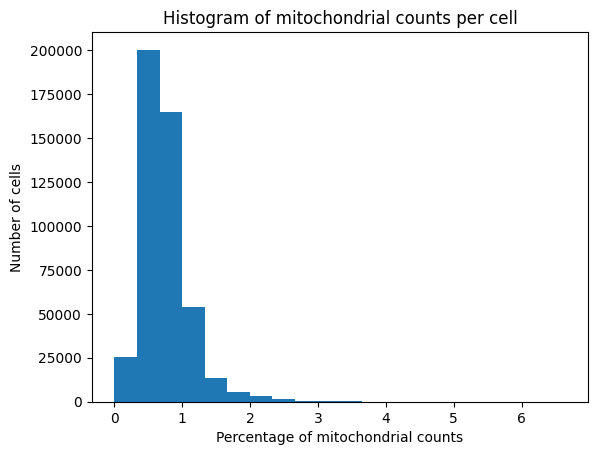

In [23]:
# Plot a histogram of the percentage of mitochondrial counts per cell
import matplotlib.pyplot as plt

plt.hist(adata_allcell.obs['pct_counts_mt'], bins=20)
plt.xlabel('Percentage of mitochondrial counts')
plt.ylabel('Number of cells')
plt.title('Histogram of mitochondrial counts per cell')
plt.show()

In [24]:
# set threshold for mitochondrial gene expression
mt_threshold = 1.75  # Adjust accordingly

# Filter cells with high mitochondrial gene expression
adata_allcell = adata_allcell[adata_allcell.obs['pct_counts_mt'] < mt_threshold]

In [25]:
adata_allcell.obs

,tissue_in_publication,assay_ontology_term_id,donor_id,anatomical_information,n_counts_UMIs,n_genes,cell_ontology_class,free_annotation,manually_annotated,compartment,...,tissue,self_reported_ethnicity,development_stage,n_counts,n_counts_normalized,n_counts_normalized_log,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7633.0,2258,macrophage,Monocyte/Macrophage,True,immune,...,liver,European,67-year-old human stage,5622.753906,1.000000e+06,13539.161133,2258,13539.163086,97.358482,0.719088
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,2858.0,1152,monocyte,Monocyte,True,immune,...,liver,European,67-year-old human stage,4306.859863,1.000000e+06,7671.958984,1152,7671.958984,95.745674,1.247995
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,7787.0,2981,endothelial cell of hepatic sinusoid,Endothelial,True,endothelial,...,liver,European,67-year-old human stage,8742.258789,1.000000e+06,16919.402344,2981,16919.402344,90.667084,0.535876
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,10395.0,2594,macrophage,Monocyte/Macrophage,True,immune,...,liver,European,67-year-old human stage,5884.861328,1.000000e+06,15165.652344,2594,15165.652344,89.637054,0.591053
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1,Liver,EFO:0009922,TSP6,nan,6610.0,2124,liver dendritic cell,Dendritic cell,True,immune,...,liver,European,67-year-old human stage,5653.610352,1.000000e+06,12854.417969,2124,12854.417969,98.195663,0.763906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P19_S379,Vasculature,EFO:0008931,TSP2,aorta,67836.0,1363,endothelial cell,endothelial cell,True,endothelial,...,aorta,African American or Afro-Caribbean,61-year-old human stage,3655.148193,1.000000e+06,8195.750000,1363,8195.749023,91.715286,1.119059
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P21_S381,Vasculature,EFO:0008931,TSP2,aorta,20498.0,903,endothelial cell,endothelial cell,True,endothelial,...,aorta,African American or Afro-Caribbean,61-year-old human stage,3127.264160,1.000000e+06,5978.539062,903,5978.539551,96.092422,1.607289
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P7_S367,Vasculature,EFO:0008931,TSP2,aorta,195639.0,2751,endothelial cell,endothelial cell,True,endothelial,...,aorta,African American or Afro-Caribbean,61-year-old human stage,5076.381348,1.000000e+06,13960.943359,2751,13960.943359,96.571106,0.691723
TSP2_Vasculature_aorta_SS2_B114577_B133059_Endothelial_P8_S368,Vasculature,EFO:0008931,TSP2,aorta,37260.0,983,endothelial cell,endothelial cell,True,endothelial,...,aorta,African American or Afro-Caribbean,61-year-old human stage,3088.750732,1.000000e+06,6290.639160,983,6290.638672,77.144325,1.226335


In [30]:
adata_allcell.var

,feature_type,highly_variable,means,dispersions,dispersions_norm,mean,std,feature_is_filtered,feature_name,feature_reference,feature_biotype,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
ensemblid,,,,,,,,,,,,,,,,,
ENSG00000223972,Gene Expression,False,0.000064,0.835044,-0.573947,0.000039,0.005574,False,DDX11L1,NCBITaxon:9606,gene,80,False,80,0.000327,99.982953,153.682648
ENSG00000227232,Gene Expression,False,0.002274,2.442280,0.533203,0.001080,0.031731,False,WASH7P,NCBITaxon:9606,gene,3048,False,3048,0.007627,99.350510,3579.362549
ENSG00000278267,Gene Expression,False,0.000062,1.295335,-0.256874,0.000033,0.005634,False,MIR6859-1,NCBITaxon:9606,gene,44,False,44,0.000201,99.990624,94.517403
ENSG00000243485,Gene Expression,False,0.000137,2.656352,0.680668,0.000048,0.008041,False,MIR1302-2HG,NCBITaxon:9606,gene,48,False,48,0.000181,99.989772,85.145004
ENSG00000237613,Gene Expression,False,0.000011,0.318123,-0.930031,0.000007,0.002288,False,FAM138A,NCBITaxon:9606,gene,16,False,16,0.000080,99.996591,37.716190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695,Gene Expression,False,0.963484,2.466404,0.154140,0.590065,0.741395,False,MT-ND6,NCBITaxon:9606,gene,237181,True,237181,0.453170,49.459717,212669.046875
ENSG00000210194,Gene Expression,False,0.160067,1.603787,-0.044396,0.083929,0.301820,False,MT-TE,NCBITaxon:9606,gene,44876,True,44876,0.111443,90.437490,52299.613281
ENSG00000198727,Gene Expression,False,4.367693,4.765751,-0.499747,3.874830,1.104192,False,MT-CYB,NCBITaxon:9606,gene,464695,True,464695,1.512316,0.979350,709726.312500


ELBOW METHOD

In [22]:
# no. of cells present in dataset 
adata_allcell.n_obs

456975

In [23]:
adata_allcell.X.shape[0]

456975

In [26]:
'''
from sklearn.cluster import KMeans

# function returns WSS(Within-Cluster-Sum of Squared Errors) score for k values from 1 to kmax
def calculate_WSS(X_data, kmax):
  wsse = []
  k = 1
  while(k!= kmax+1):
    k_means = KMeans(n_clusters = k).fit(X_data)
    centroids = k_means.cluster_centers_
    pred_clusters = k_means.predict(X_data)
    current_wsse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to the current WSS
    Xdata_shape = X_data.shape[0]
    i = 0
    while(i != Xdata_shape):
      current_center = centroids[pred_clusters[i]]
      x0 = X_data[i, 0] - current_center[0]
      x1 = X_data[i, 1] - current_center[1]
      current_wsse += x0*x0 + x1*x1
      i+=1
    k+=1
      
    wsse.append(current_wsse)
  return wsse
'''

In [28]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 1, random_state = 42).fit(adata_allcell.X)
wsse = k_means.rfv
print("wsse: \n",wsse)
print("k = 1")
print("k-means: ",k_means)


wsse: 
 1232159360.0
k = 1
k-means:  KMeans(n_clusters=1, random_state=42)


In [29]:
k = 2
k_means = KMeans(n_clusters = k, random_state = 42).fit(adata_allcell.X)
wsse = k_means.inertia_
print("wsse: \n",wsse)
print("k =",k)
print("k-means: ",k_means)

wsse: 
 1203761280.0
k = 2
k-means:  KMeans(n_clusters=2, random_state=42)


In [24]:
#optimized function - inertia_ attribute directly gives the sum of squared distances of each point from its cluster center
from sklearn.cluster import KMeans

# function returns WSS(Within-Cluster-Sum of Squared Errors) score for k values from 1 to kmax
def calculate_WSS_short_double_k(X_data, kmax):
    wsse = []
    k_val = []
    k = 1
    while((k <= kmax)):
        k_means = KMeans(n_clusters = k, random_state = 42).fit(X_data)
        print(k_means)
        curr_wsse = k_means.inertia_
        wsse.append(curr_wsse)
        print("wsse:", curr_wsse)
        k_val.append(k)
        print("k=",k)
        k *= 2
    
    return wsse, k_val
        
  

In [25]:
import math

#max value of k(clusters) as the sqrt of no. of cells in the dataset div by 2
kmax = (math.sqrt(adata_allcell.n_obs))//2
print(kmax)
kmax = round(kmax)
print(kmax)

337.0
337


In [ ]:

#k = range(1, kmax+1)

#wsse = calculate_WSS(adata_allcell.X, kmax)


'''
#considering first 56975 samples
adata_allcell_subset = adata_allcell[:56975]

wsse = calculate_WSS_short(adata_allcell_subset.X, kmax)
'''
wsse, k_val = calculate_WSS_short_double_k(adata_allcell.X, kmax)

print(k_val)


KMeans(n_clusters=1, random_state=42)
wsse: 1232159488.0
k= 1
KMeans(n_clusters=2, random_state=42)
wsse: 1203761280.0
k= 2
KMeans(n_clusters=4, random_state=42)
wsse: 1171111040.0
k= 4
KMeans(random_state=42)
wsse: 1147721088.0
k= 8
KMeans(n_clusters=16, random_state=42)
wsse: 1126852096.0
k= 16
KMeans(n_clusters=32, random_state=42)
wsse: 1104359040.0
k= 32


In [24]:
k_val = [1, 2, 4, 8, 16, 32]
wsse = [1232159488.0, 1203761280.0, 1171111040.0, 1147721088.0, 1126852096.0, 1104359040.0]

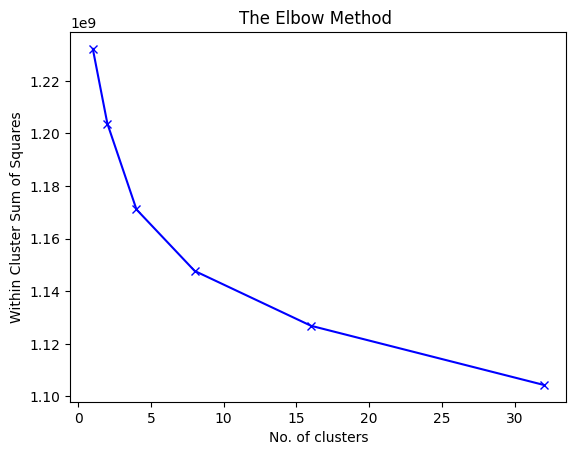

In [25]:
import matplotlib.pyplot as plt

plt.plot(k_val, wsse, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('The Elbow Method ')
plt.show()

In [28]:
#optimized function - inertia_ attribute directly gives the sum of squared distances of each point from its cluster center
from sklearn.cluster import KMeans

# function returns WSS(Within-Cluster-Sum of Squared Errors) score for k values from 1 to kmax
def calculate_WSS_short_single_k(X_data, kmax):
    wsse = []
    k_val = []
    k = 15
    while((k <= kmax)):
        k_means = KMeans(n_clusters = k, random_state = 42).fit(X_data)
        print(k_means)
        curr_wsse = k_means.inertia_
        wsse.append(curr_wsse)
        print("wsse:", curr_wsse)
        k_val.append(k)
        print("k=",k)
        k += 1
    
    return wsse, k_val

In [29]:
kmax = 20

wsse, k_val = calculate_WSS_short_single_k(adata_allcell.X, kmax)

KMeans(n_clusters=15, random_state=42)
wsse: 1131005824.0
k= 15
KMeans(n_clusters=16, random_state=42)
wsse: 1126852096.0
k= 16
KMeans(n_clusters=17, random_state=42)
wsse: 1123440896.0
k= 17
KMeans(n_clusters=18, random_state=42)
wsse: 1119379712.0
k= 18
KMeans(n_clusters=19, random_state=42)
wsse: 1116904448.0
k= 19
KMeans(n_clusters=20, random_state=42)
wsse: 1116104320.0
k= 20


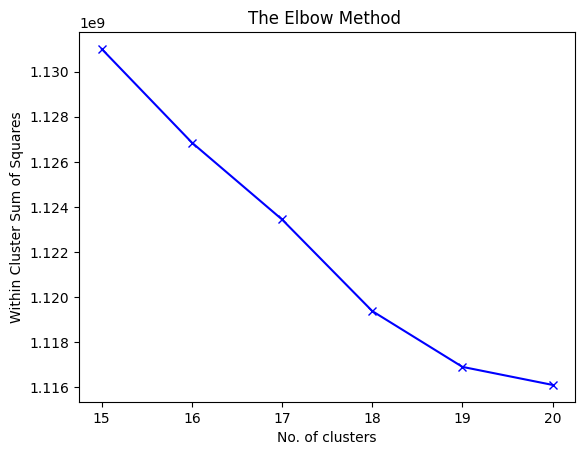

In [30]:
import matplotlib.pyplot as plt

plt.plot(k_val, wsse, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('The Elbow Method ')
plt.show()

Number of Clusters: 19 



 
 Cluster Labels:

 [2 2 9 ... 7 7 7]


/tmp/ipykernel_18225/747808.py:17: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_allcell.obs['kmeans_clusters'] = c_labels


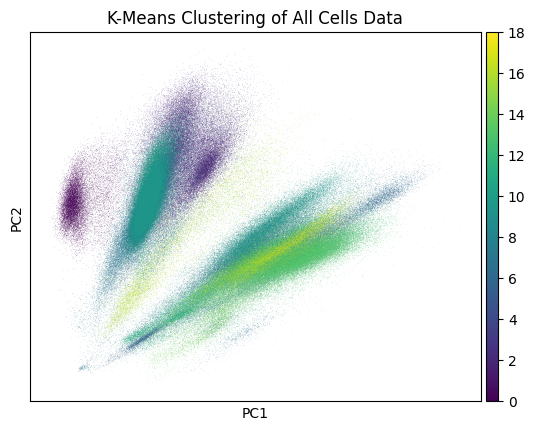

In [31]:
# number of clusters - value of K
clusters_k = 19

print("Number of Clusters:",clusters_k, "\n\n")

#Initialize K-Means model 
K_Means = KMeans(n_clusters=clusters_k, random_state=0)

#train the model
K_Means.fit(adata_allcell.X)

# Extract cluster labels for each cell
c_labels = K_Means.labels_
print("\n \n Cluster Labels:\n\n",c_labels)

# Add cluster labels to AnnData object
adata_allcell.obs['kmeans_clusters'] = c_labels

# View clusters using PCA
sc.pl.pca(adata_allcell, color=['kmeans_clusters'], title="K-Means Clustering of All Cells Data")

SILHOUETTE METHOD



In [26]:
from sklearn.metrics import silhouette_score

In [27]:
from sklearn.cluster import KMeans

def calculate_sil_scores_double_k(X_data, kmax):
    
    sil = []
    k_val = []

    k=2
    # dissimilarity would not be defined for a single cluster, therefore, minimum number of clusters should be 2
    while((k <= kmax)):
        k_means = KMeans(n_clusters = k).fit(X_data)
        print(k_means)
        labels = k_means.labels_
        sil_score = silhouette_score(X_data, labels, metric = 'euclidean')
        sil.append(sil_score)
        print("sil_score: ",sil_score)
        k_val.append(k)
        print("k = ",k)
        k*=2
    return sil

In [28]:
import math

#max value of k(clusters) as the sqrt of no. of cells in the dataset div by 2
kmax = (math.sqrt(adata_allcell.n_obs))//2
print(kmax)
kmax = round(kmax)
print(kmax)

339.0
339


In [29]:
print(adata_allcell.X.shape[0])

print(adata_allcell.X.shape[0]//4)

459832
114958


In [35]:
adata_allcell_sub1 = adata_allcell[:114243]

In [ ]:
#k = range(2, kmax+1)

#considering entire daataset
sil_scores, s_k_val = calculate_sil_scores_double_k(adata_allcell.X, kmax)

print(s_k_val)


KMeans(n_clusters=2)


In [ ]:
import matplotlib.pyplot as plt

plt.plot(s_k_val, sil_scores, 'rx-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title('The Silhouette Method ')
plt.show()

In [ ]:
# number of clusters - value of K
#clusters_k = value from above graph

print("Number of Clusters:",clusters_k, "\n\n")

#Initialize K-Means model 
K_Means = KMeans(n_clusters=clusters_k, random_state=0)

#train the model
K_Means.fit(adata_allcell.X)

# Extract cluster labels for each cell
c_labels = K_Means.labels_
print("\n \n Cluster Labels:\n\n",c_labels)

# Add cluster labels to AnnData object
adata_allcell.obs['kmeans_clusters'] = c_labels

# View clusters using PCA
sc.pl.pca(adata_allcell, color=['kmeans_clusters'], title="K-Means Clustering of All Cells Data")